# Piplene   
    прочитаю данные, очищу их, сделаю EDA, обучу модель, подберу гиперпаратмеры

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# читаю файл и вывожу первые 5 строк
file = 'train.csv'
titanic = pd.read_csv(file)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# count missing values
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
# fill missing values
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].mean()) # fill missing values in Age with mean

<Figure size 640x480 with 0 Axes>

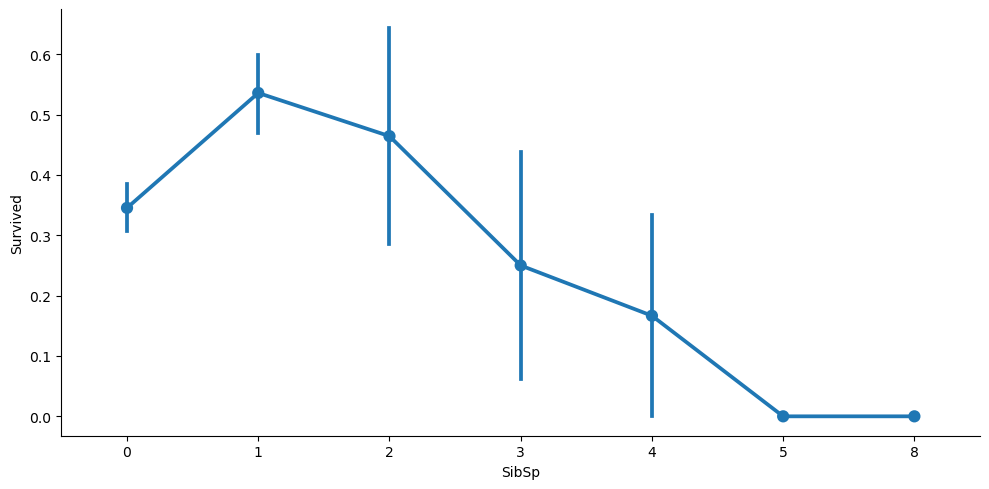

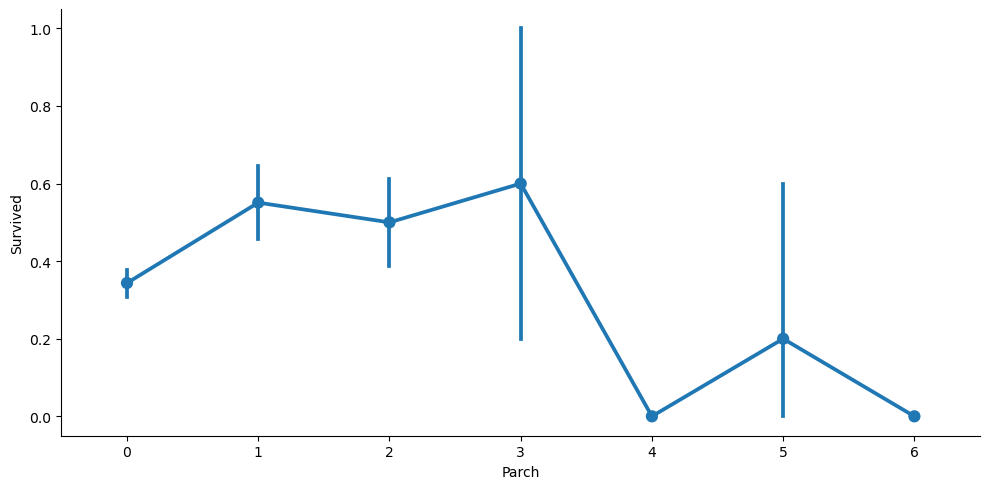

In [5]:
# combine SibSp and Parch into one column
# видно что чем больше родственников на борту, тем меньше шансов выжить
for i, col in enumerate(['SibSp', 'Parch']):
    plt.figure(i)
    sns.catplot(x=col, y='Survived', data=titanic, kind='point', aspect=2, )

In [6]:
titanic['Family_count'] = titanic['SibSp'] + titanic['Parch']

In [7]:
# большое количество не нужных признаков тоже не на  пользу модели, поэтому удалим ненужные столбцы
titanic.drop(['PassengerId', 'SibSp', 'Parch'], axis=1, inplace=True) # inplace=True - не забываем что мы меняем объект
titanic.head()

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family_count
0,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,1
4,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,0


In [8]:
# save to csv
titanic.to_csv('titanic_clean.csv', index=False) # index=False - не сохраняем индексы(0,1,2,3,4...)

In [9]:
# binarize cabin index. Важен не номер каюты, а сам факт её наличия или отсутвия
# перевеодим значения в каюте в 1, а пропуски в 0
# where (что проверяем, еслии ноль возвращаем 0, если нет то 1)
titanic['Cabin_ind'] = np.where(titanic['Cabin'].isnull(), 0, 1)


In [10]:
# sex -> nummeric 0 male, 1 female
titanic['Sex'] = titanic['Sex'].map({'male': 0, 'female': 1})
titanic

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family_count,Cabin_ind
0,0,3,"Braund, Mr. Owen Harris",0,22.000000,A/5 21171,7.2500,NaN,S,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,PC 17599,71.2833,C85,C,1,1
2,1,3,"Heikkinen, Miss. Laina",1,26.000000,STON/O2. 3101282,7.9250,NaN,S,0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,113803,53.1000,C123,S,1,1
4,0,3,"Allen, Mr. William Henry",0,35.000000,373450,8.0500,NaN,S,0,0
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",0,27.000000,211536,13.0000,NaN,S,0,0
887,1,1,"Graham, Miss. Margaret Edith",1,19.000000,112053,30.0000,B42,S,0,1
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,29.699118,W./C. 6607,23.4500,NaN,S,3,0
889,1,1,"Behr, Mr. Karl Howell",0,26.000000,111369,30.0000,C148,C,0,1


In [11]:
# избавляемся от ненужных столбцов
titanic.drop(['Cabin', 'Embarked', 'Name', 'Ticket'], axis=1, inplace=True)

In [12]:
titanic.head()

,Survived,Pclass,Sex,Age,Fare,Family_count,Cabin_ind
0,0,3,0,22.0,7.2500,1,0
1,1,1,1,38.0,71.2833,1,1
2,1,3,1,26.0,7.9250,0,0
3,1,1,1,35.0,53.1000,1,1
4,0,3,0,35.0,8.0500,0,0


In [13]:
titanic.to_csv('titanic_clean.csv', index=False) # сохраняю в новый файл

In [14]:
titanic = pd.read_csv('titanic_clean.csv') # загружаю из файла
titanic.head()

,Survived,Pclass,Sex,Age,Fare,Family_count,Cabin_ind
0,0,3,0,22.0,7.2500,1,0
1,1,1,1,38.0,71.2833,1,1
2,1,3,1,26.0,7.9250,0,0
3,1,1,1,35.0,53.1000,1,1
4,0,3,0,35.0,8.0500,0,0


In [15]:
# разделяем данные на тренировочные и тестовые и валидационные
from sklearn.model_selection import train_test_split
feutures = titanic.drop('Survived', axis=1)
labels = titanic['Survived']

# разделяю фичи на X_train, X_test, затем labels на y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(feutures, labels, test_size=0.4, random_state=42) # разделяем на тренировочные и тестовые
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42) # разделяем на валидационные и тестовые

# проверю что все правильно разделилось
for dataset in [y_train, y_val, y_test]:
    print(round(len(dataset) / len(labels), 2))

0.6
0.2
0.2


In [16]:
# когда есть проработанные данные и в нужном виде, с нужными признаками. можно сохранить на вссякий случай
X_train.to_csv('cleaned/train_features.csv', index=False)
X_test.to_csv('cleaned/test_features.csv', index=False)
X_val.to_csv('cleaned/val_features.csv', index=False)

y_train.to_csv('cleaned/train_labels.csv', index=False)
y_test.to_csv('cleaned/test_labels.csv', index=False)
y_val.to_csv('cleaned/val_labels.csv', index=False)


# cross validation

In [17]:
#  cross validation. делим на 5 частей, на 4 частях будет обучение, а на 1 тест
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import cross_val_score

train_features = pd.read_csv('cleaned/train_features.csv')
train_labels = pd.read_csv('cleaned/train_labels.csv')

val_features = pd.read_csv('cleaned/val_features.csv')
val_labels = pd.read_csv('cleaned/val_labels.csv')

test_features = pd.read_csv('cleaned/test_features.csv')
test_labels = pd.read_csv('cleaned/test_labels.csv')

rf = RandomForestClassifier() # создаём модель пока без параметров

# cv=5 - 5 частей, на каждой из которых будем смотреть среднее значение и ошибку
# train_labels.values.ravel() так как train_labels это DataFrame, а нам нужен массив
scores = cross_val_score(rf, train_features, train_labels.values.ravel(), cv=5) 

In [18]:
scores

array([0.8317757 , 0.81308411, 0.78504673, 0.81308411, 0.83962264])

In [19]:
# далее можно взять усредненное значение из массива и использовать его как финальное
scores.mean()

0.8165226591430083

In [20]:
# настройка гиперпараметров и смотреть как меняется качество модели.
# можно использовать GridSearchCV

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier() 

# параметры которые будем менять
hyperparameters = { # параметры которые будем менять
    'n_estimators': [5, 25, 50, 100], # количество деревьев
    'max_depth': [2, 12, 24, None] # глубина деревьев, None - без ограничения.
}

cross_val = GridSearchCV(rf, hyperparameters, cv=5) # verbose=0 - не выводить лишнюю информацию

cross_val.fit(train_features, train_labels.values.ravel())

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 12, 24, None],
                         'n_estimators': [5, 25, 50, 100]})

In [21]:
def results(results):
    print("Optimal hyperparameters:\n{}".format(results.best_params_))
    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']    
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print("Mean: {} (std: {}) with: {}".format(round(mean, 3), round(std * 2, 3), params))

In [22]:
results(cross_val)

Optimal hyperparameters:
{'max_depth': 12, 'n_estimators': 50}
Mean: 0.792 (std: 0.133) with: {'max_depth': 2, 'n_estimators': 5}
Mean: 0.787 (std: 0.102) with: {'max_depth': 2, 'n_estimators': 25}
Mean: 0.785 (std: 0.116) with: {'max_depth': 2, 'n_estimators': 50}
Mean: 0.807 (std: 0.099) with: {'max_depth': 2, 'n_estimators': 100}
Mean: 0.805 (std: 0.028) with: {'max_depth': 12, 'n_estimators': 5}
Mean: 0.813 (std: 0.062) with: {'max_depth': 12, 'n_estimators': 25}
Mean: 0.83 (std: 0.046) with: {'max_depth': 12, 'n_estimators': 50}
Mean: 0.817 (std: 0.046) with: {'max_depth': 12, 'n_estimators': 100}
Mean: 0.788 (std: 0.062) with: {'max_depth': 24, 'n_estimators': 5}
Mean: 0.805 (std: 0.028) with: {'max_depth': 24, 'n_estimators': 25}
Mean: 0.818 (std: 0.043) with: {'max_depth': 24, 'n_estimators': 50}
Mean: 0.809 (std: 0.043) with: {'max_depth': 24, 'n_estimators': 100}
Mean: 0.805 (std: 0.032) with: {'max_depth': None, 'n_estimators': 5}
Mean: 0.82 (std: 0.052) with: {'max_depth': 

In [23]:
# беру топ 3 параметров и делаю три модели
rf1 = RandomForestClassifier(n_estimators=50, max_depth=12) 
rf1.fit(train_features, train_labels.values.ravel())

rf2 = RandomForestClassifier(n_estimators=25, max_depth=12) 
rf2.fit(train_features, train_labels.values.ravel())

rf3 = RandomForestClassifier(n_estimators=100, max_depth=12) 
rf3.fit(train_features, train_labels.values.ravel())

RandomForestClassifier(max_depth=12)

In [24]:
# поскольку это задача классификации, то можно использовать accuracy_score, precision_score, recall_score
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [25]:
# модель rf1 обладает лучшими показателями
for mdl in [rf1, rf2, rf3]:
    y_pred = mdl.predict(val_features)
    accuracy = round(accuracy_score(val_labels, y_pred), 3)
    precision = round(precision_score(val_labels, y_pred), 3)
    recall = round(recall_score(val_labels, y_pred), 3)
    print('MAX DEPTH: {} ||  ESTIMATORS: {} ||| A: {}  ||  P: {} || R: {}'.format(mdl.max_depth, mdl.n_estimators, accuracy, precision, recall))

MAX DEPTH: 12 ||  ESTIMATORS: 50 ||| A: 0.81  ||  P: 0.818 || R: 0.711
MAX DEPTH: 12 ||  ESTIMATORS: 25 ||| A: 0.827  ||  P: 0.846 || R: 0.724
MAX DEPTH: 12 ||  ESTIMATORS: 100 ||| A: 0.816  ||  P: 0.821 || R: 0.724


In [26]:
y_pred = rf1.predict(test_features)
accuracy = round(accuracy_score(test_labels, y_pred), 3)
precision = round(precision_score(test_labels, y_pred), 3)
recall = round(recall_score(test_labels, y_pred), 3)
print('MAX DEPTH: {} ||  ESTIMATORS: {} ||| A: {}  ||  P: {} || R: {}'.format(rf1.max_depth, rf1.n_estimators, accuracy, precision, recall))

MAX DEPTH: 12 ||  ESTIMATORS: 50 ||| A: 0.792  ||  P: 0.741 || R: 0.662
